In [8]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(360, 360, 3)


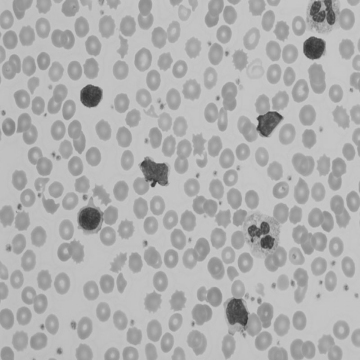

In [101]:
#img = cv2.imread('/content/drive/My Drive/ip/Images/lena256.jpg')
#img = cv2.imread('/content/drive/My Drive/ip/Images/rice.bmp')
img = cv2.imread('/content/drive/My Drive/ip/Images/cell.bmp')
#img = cv2.imread('/content/drive/My Drive/ip/Images/milkdrop.bmp')
print(img.shape)
gImg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(gImg1.shape)
cv2_imshow(gImg1)

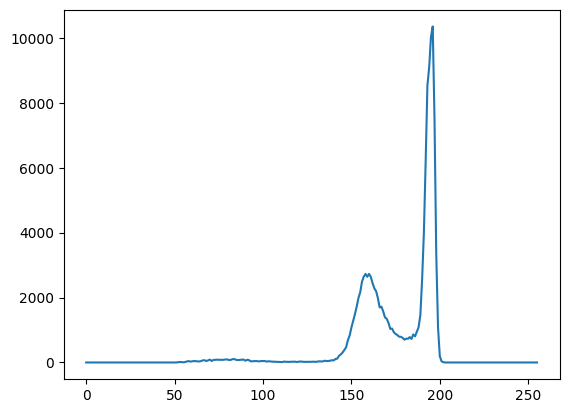

In [102]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0, 256])
plt.plot(hist)

In [103]:
gBin = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype=np.ubyte)

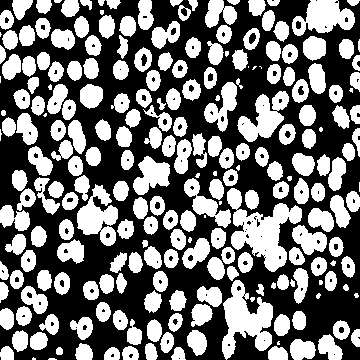

In [104]:
Threshold = 180
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h, w] > Threshold:
      gBin[h , w] = 0
    else:
      gBin[h , w] = 255

cv2_imshow(gBin)

In [105]:
T1 = 150
T2 = 0
T0 = 1

In [111]:
def threshold_update(img, bimg):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
   for w in range(img.shape[1]):
    if (bimg[h, w] == 0):
      sum1 =np.int32(sum1 + img[h, w])
      count1+= 1
    else:
      sum2 = np.int32(sum2 + img[h, w])
      count2+=1

  avg1 = sum1/count1
  avg2 = sum2/count2
  T0 = (avg1 + avg2)/2
  return T0

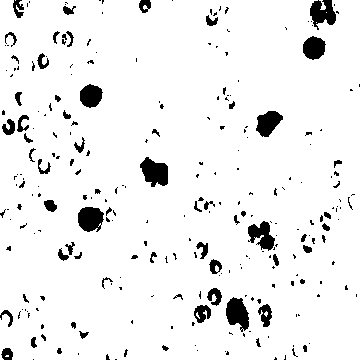

In [112]:
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h, w] > T1:
      gBin[h , w] = 255
    else:
      gBin[h , w] = 0

cv2_imshow(gBin)

150.8596318178378


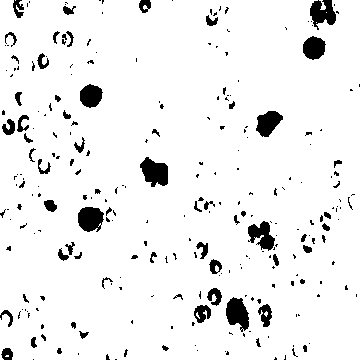

In [113]:
while True:
  T2 = threshold_update(gImg1, gBin)
  print(T2)

  if (np.abs(T1-T2) < T0):
    break
  else:
    T1= T2
    for h in range(gImg1.shape[0]):
      for w in range(gImg1.shape[1]):
        if gImg1[h, w] > T1:
          gBin[h , w] = 255
        else:
            gBin[h , w] = 0
cv2_imshow(gBin)